# ARIMA Model for AQI and Concentration Prediction of Pollutants

To compare with the CART model, we used a univariate ARIMA model with the last 120 samples (5 days) as the validation set. We tuned the values of p, d and q to optimize on the rmse. Though the model fairly captured the trend of the validation dataset for the first 20 samples, the performance dropped significantly after that. Moreover, the curve obtained is smooth without the presence of the spikes in the original data, similar to a best-fit curve. We got best results for (p,d,q) = (25,0,1).

### Import Libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from tqdm import tqdm

In [ ]:
# Load the clean dataset
df = pd.read_csv('all_outlier_removed.csv', header=0)
df.head()

,Timestamp,Ozone_Concentration,PM2.5_Concentration,Ozone_Unit,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,Ozone_AQI_Category,PM2.5_AQI_Category
0,2023-01-05T19:00,32.0,5.4,PPB,UG/M3,30.0,23.0,1.0,1.0
1,2023-01-05T20:00,31.0,4.8,PPB,UG/M3,29.0,20.0,1.0,1.0
2,2023-01-05T21:00,35.0,4.1,PPB,UG/M3,32.0,17.0,1.0,1.0
3,2023-01-05T22:00,30.0,3.9,PPB,UG/M3,28.0,16.0,1.0,1.0
4,2023-01-05T23:00,27.0,4.1,PPB,UG/M3,25.0,17.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            7259 non-null   object 
 1   Ozone_Concentration  7259 non-null   float64
 2   PM2.5_Concentration  7259 non-null   float64
 3   Ozone_Unit           7240 non-null   object 
 4   PM2.5_Unit           7211 non-null   object 
 5   Ozone_AQI            7259 non-null   float64
 6   PM2.5_AQI            7259 non-null   float64
 7   Ozone_AQI_Category   7259 non-null   float64
 8   PM2.5_AQI_Category   7259 non-null   float64
dtypes: float64(6), object(3)
memory usage: 510.5+ KB


### AQI for Ozone

[17.03554598 16.82545087 16.26909535 15.6728825  15.07421008 14.47676255
 13.82086362 13.24487166 12.73990248 12.40680146 12.2566145  12.27769945
 12.58537887 13.12682491 13.93015979 14.95461947 16.11963834 17.36593715
 18.59909854 19.73715253 20.70437626 21.45211536 21.92873457 22.15667443
 22.15323609 21.94182927 21.55595481 21.04541451 20.45824194 19.84106187
 19.23866858 18.70075729 18.26805176 17.97598399 17.84996281 17.90457804
 18.14438698 18.55875357 19.1249413  19.80885591 20.56767647 21.35324709
 22.11630293 22.81008047 23.39428922 23.83823321 24.12224933 24.23930091
 24.19381561 24.00073449 23.6840458  23.27483395 22.808772   22.32375165
 21.8575015  21.44543883 21.11824799 20.90009927 20.80718766 20.84680277
 21.01697361 21.30669137 21.69683659 22.16167559 22.67080577 23.19140435
 23.69064256 24.13801281 24.50743221 24.7789447  24.93990505 24.98560583
 24.91930431 24.75171002 24.49999544 24.18641206 23.83662279 23.47787392
 23.13712351 22.83924795 22.60542847 22.45182959 22

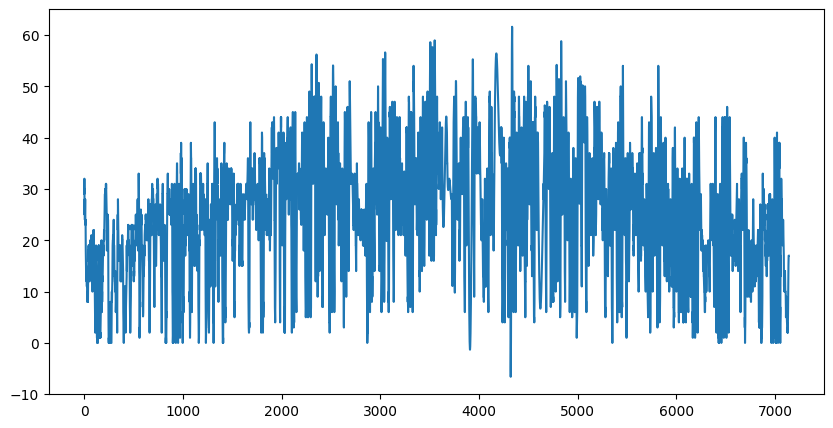

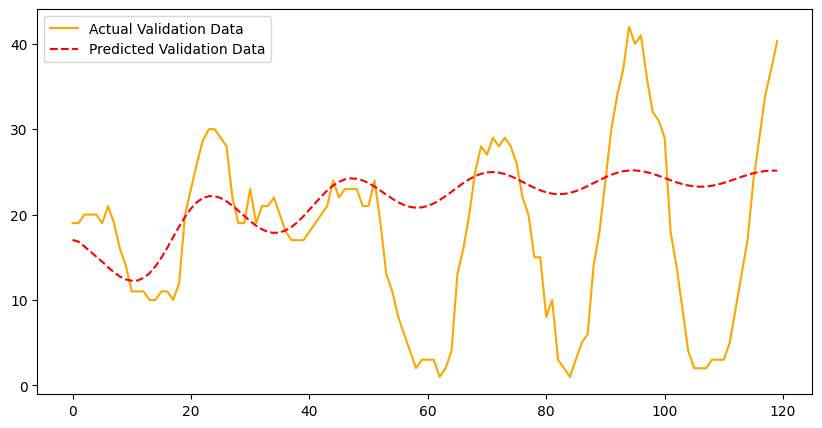

In [ ]:
### 9 months of training + 5 days of validation).
# Train on 9 months of data
X = df["AQI_Ozone"].values

val_start_index = -5*24  # Using the last 5 days (120 samples) as validation set

# Split the dataset
train, val = X[:val_start_index], X[val_start_index:]

# Convert train to list for subsequent appending
history = [x for x in train]
preds = []

# Fit the ARIMA model on the entire training dataset
model = ARIMA(history, order=(25, 0, 1))
model_fit = model.fit()

# Forecast the values for the next 5 days
preds = model_fit.forecast(steps=len(val))
print(preds)

rmse = math.sqrt(mean_squared_error(val, preds))
print('Validation RMSE: %.3f' % rmse)

pyplot.figure(figsize=(10, 5))
pyplot.plot(train)
pyplot.show()

# Plotting the validation set and the predictions
pyplot.figure(figsize=(10, 5))
val_line, = pyplot.plot(val, label='Actual Validation Data', color='orange')
pred_line, = pyplot.plot(preds, label='Predicted Validation Data', color='red', linestyle='--')
pyplot.legend(handles=[val_line, pred_line])
pyplot.show()

### Concentration for Ozone

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[18.02034211 17.76844563 17.13929864 16.43512107 15.7594994  15.0969054
 14.38986305 13.76832386 13.25483003 12.94476212 12.81673923 12.90826943
 13.28293596 13.91364829 14.83139904 15.96892372 17.26385363 18.60604564
 19.92281049 21.12187424 22.13901144 22.90359206 23.38281119 23.59678014
 23.56466153 23.30794477 22.86816438 22.30001846 21.65759114 20.99016931
 20.34907074 19.78662581 19.34692159 19.06591471 18.96771521 19.06707196
 19.36475269 19.84767282 20.48885963 21.24996826 22.0834534  22.93697697
 23.75791775 24.49691577 25.11199097 25.57141239 25.85611973 25.96020991
 25.89000911 25.66309042 25.3068273  24.85591255 24.34964769 23.82929532
 23.33568181 22.90655229 22.57415779 22.36330191 22.2899501  22.36033671
 22.57066599 22.90752465 23.34898014 23.86628278 24.42600658 24.99252822
 25.53060414 26.00785166 26.39695535 26.67743405 26.83684742 26.87137651
 26.78577723 26.59276059 26.31185473 25.96784824 25.58894388 25.20475867
 24.84429629 24.53401634 24.29612762 24.14721352 24.

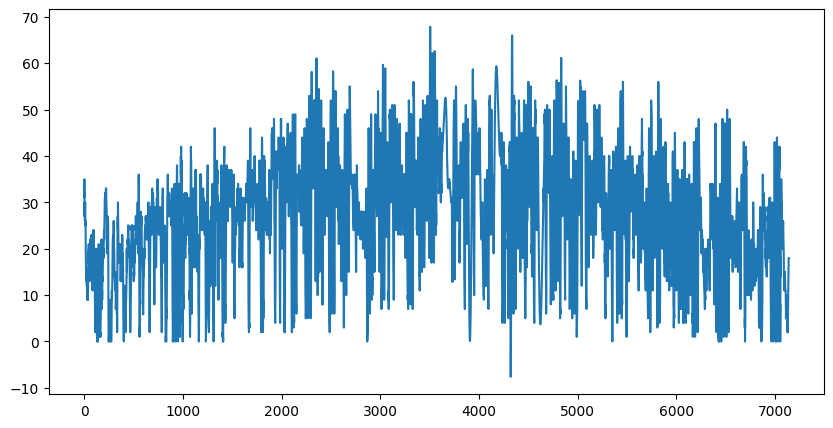

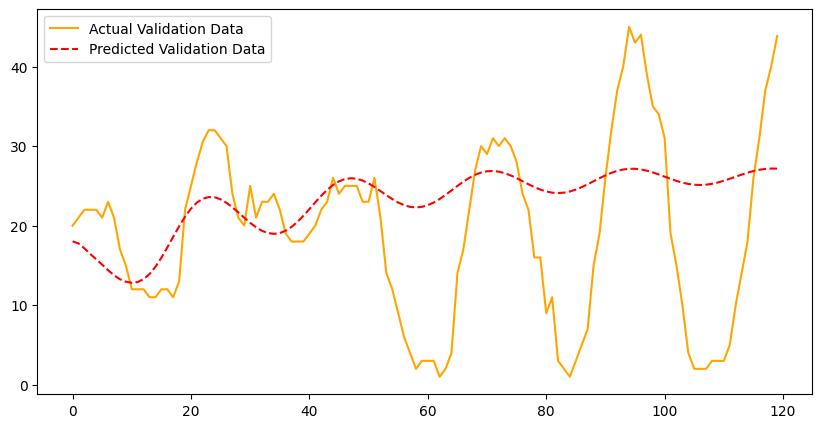

In [ ]:
### 9 months of training + 5 days of validation).

# Train on 9 months of data
X = df["Concentration_Ozone"].values

val_start_index = -5*24  # Using the last 5 days (120 samples) as validation set

# Split the dataset
train, val = X[:val_start_index], X[val_start_index:]

# Convert train to list for subsequent appending
history = [x for x in train]
preds = []

# Fit the ARIMA model on the entire training dataset
model = ARIMA(history, order=(25, 0, 1))
model_fit = model.fit()

# Forecast the values for the next 5 days
preds = model_fit.forecast(steps=len(val))
print(preds)

rmse = math.sqrt(mean_squared_error(val, preds))
print('Validation RMSE: %.3f' % rmse)

pyplot.figure(figsize=(10, 5))
pyplot.plot(train)
pyplot.show()

# Plotting the validation set and the predictions
pyplot.figure(figsize=(10, 5))
val_line, = pyplot.plot(val, label='Actual Validation Data', color='orange')
pred_line, = pyplot.plot(preds, label='Predicted Validation Data', color='red', linestyle='--')
pyplot.legend(handles=[val_line, pred_line])
pyplot.show()

### AQI for PM2.5

[ 8.25957329  9.39354999 10.72595737 12.21018549 13.43107986 14.53925037
 15.69560194 16.79566994 17.81028409 18.65843368 19.26280473 19.43603738
 19.44735011 19.49803607 19.47500687 19.60722614 19.81658079 20.09037161
 20.39203022 20.8662084  21.27791245 21.60724156 21.98114098 22.39223485
 22.81496773 23.25156873 23.71160582 24.16693891 24.61076849 25.06260667
 25.51055729 25.94040358 26.34023947 26.70069139 27.00441637 27.26499723
 27.50178929 27.71373634 27.91957467 28.12723669 28.33913576 28.55349509
 28.77728939 29.00187849 29.22061075 29.43623216 29.65043295 29.86253374
 30.07241366 30.28153609 30.48912196 30.69426565 30.8983473  31.1005862
 31.29897665 31.49148058 31.67626374 31.85113734 32.01596927 32.17206219
 32.32007833 32.4617554  32.59883972 32.73262502 32.86373076 32.99290145
 33.12010056 33.24485269 33.36700562 33.48659645 33.60360056 33.7180311
 33.83008575 33.93990929 34.04758021 34.15329666 34.25710908 34.35887624
 34.45835836 34.55528325 34.64934539 34.74036737 34.8

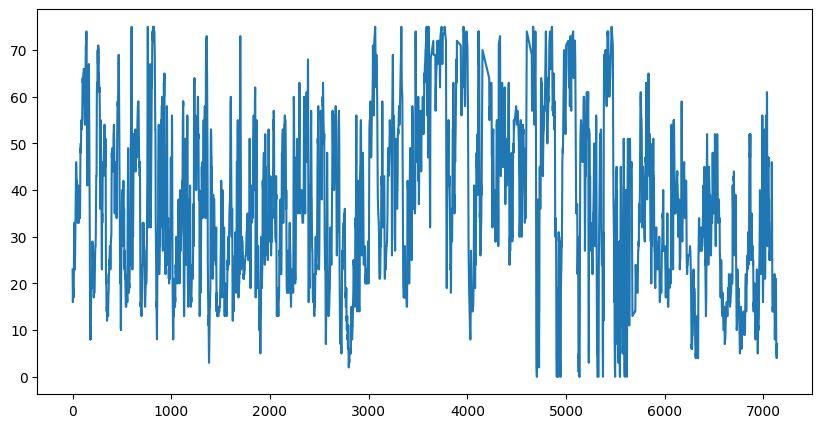

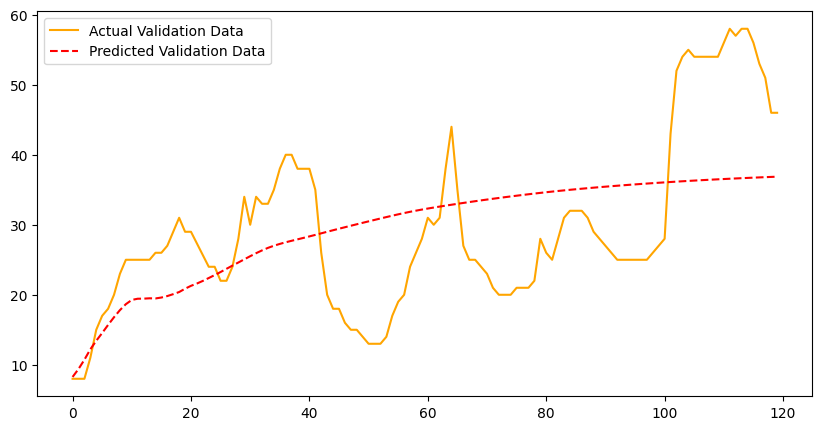

In [ ]:
### 9 months of training + 5 days of validation).

# Train on 9 months of data
X = df["AQI_PM2.5"].values

val_start_index = -5*24  # Using the last 5 days (120 samples) as validation set

# Split the dataset
train, val = X[:val_start_index], X[val_start_index:]

# Convert train to list for subsequent appending
history = [x for x in train]
preds = []

# Fit the ARIMA model on the entire training dataset
model = ARIMA(history, order=(25, 0, 1))
model_fit = model.fit()

# Forecast the values for the next 5 days
preds = model_fit.forecast(steps=len(val))
print(preds)

rmse = math.sqrt(mean_squared_error(val, preds))
print('Validation RMSE: %.3f' % rmse)

pyplot.figure(figsize=(10, 5))
pyplot.plot(train)
pyplot.show()

# Plotting the validation set and the predictions
pyplot.figure(figsize=(10, 5))
val_line, = pyplot.plot(val, label='Actual Validation Data', color='orange')
pred_line, = pyplot.plot(preds, label='Predicted Validation Data', color='red', linestyle='--')
pyplot.legend(handles=[val_line, pred_line])
pyplot.show()

### Concentration for PM2.5

[1.82072081 2.07206546 2.37794298 2.73149754 3.04590699 3.32056594
 3.60322835 3.89402728 4.15046588 4.35903302 4.53520664 4.60970575
 4.64272988 4.65956308 4.67154632 4.70339393 4.76628841 4.84853273
 4.93589334 5.05363914 5.17066071 5.26148249 5.35042686 5.44696291
 5.55104171 5.65788071 5.77242417 5.89001565 6.0061554  6.12192392
 6.23847882 6.35208289 6.45734045 6.55461737 6.64034687 6.71445914
 6.78099182 6.84170349 6.89958211 6.95746555 7.01711838 7.07756154
 7.13901752 7.20109231 7.26171669 7.3204619  7.37798715 7.43497637
 7.49134123 7.54735707 7.60334431 7.6590412  7.7143364  7.76917275
 7.82329596 7.87601997 7.9269178  7.97563421 8.02186999 8.06576136
 8.10758446 8.14769915 8.18651308 8.22443278 8.26167041 8.29828675
 8.33431576 8.36967349 8.40425989 8.43803952 8.47105797 8.50335572
 8.53497213 8.56598231 8.59643622 8.6263593  8.65576144 8.68463208
 8.71291645 8.7405414  8.76744443 8.79357    8.81889509 8.84343267
 8.86722332 8.8903242  8.9128017  8.9347179  8.95611612 8.9770

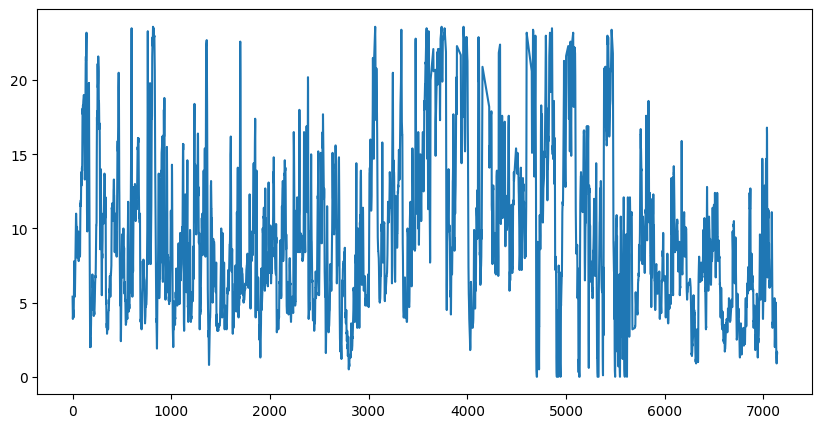

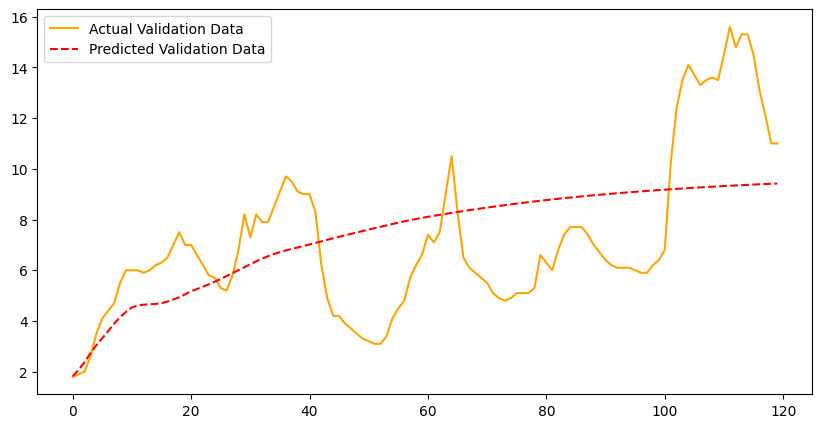

In [ ]:
### 9 months of training + 5 days of validation).

# Train on 9 months of data
X = df["Concentration_PM2.5"].values

val_start_index = -5*24  # Using the last 5 days (120 samples) as validation set

# Split the dataset
train, val = X[:val_start_index], X[val_start_index:]

# Convert train to list for subsequent appending
history = [x for x in train]
preds = []

# Fit the ARIMA model on the entire training dataset
model = ARIMA(history, order=(25, 0, 1))
model_fit = model.fit()

# Forecast the values for the next 5 days
preds = model_fit.forecast(steps=len(val))
print(preds)

rmse = math.sqrt(mean_squared_error(val, preds))
print('Validation RMSE: %.3f' % rmse)

pyplot.figure(figsize=(10, 5))
pyplot.plot(train)
pyplot.show()

# Plotting the validation set and the predictions
pyplot.figure(figsize=(10, 5))
val_line, = pyplot.plot(val, label='Actual Validation Data', color='orange')
pred_line, = pyplot.plot(preds, label='Predicted Validation Data', color='red', linestyle='--')
pyplot.legend(handles=[val_line, pred_line])
pyplot.show()